In [ ]:
env = gym.make(args.task)
dataset = qlearning_dataset(env)
buffer = ReplayBuffer(
    buffer_size=len(dataset["observations"]),
    obs_shape=args.obs_shape,
    obs_dtype=np.float32,
    action_dim=args.action_dim,
    action_dtype=np.float32,
    device=args.device
)
buffer.load_dataset(dataset)

In [1]:
!python run_example/plotter.py --algos "combo" --task "hopper-medium-replay-v2"

Traceback (most recent call last):
  File "/root/volume/OfflineRL-Kit/run_example/plotter.py", line 173, in <module>
    csv_file = merge_csv(path, args.query_file, args.query_x, args.query_y)
  File "/root/volume/OfflineRL-Kit/run_example/plotter.py", line 42, in merge_csv
    assert len(results) > 0
AssertionError


In [ ]:
#importing required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold , cross_val_score
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

#splitting the data into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 14)

#declaring parameters grid
k_value = list(range(2,11))
algorithm = ['auto','ball_tree','kd_tree','brute']
scores = []
best_comb = []
kfold = KFold(n_splits=5)

#hyperparameter tunning
for algo in algorithm:
  for k in k_value:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm=algo)
    results = cross_val_score(knn,X_train,y_train,cv = kfold)

    print(f'Score:{round(results.mean(),4)} with algo = {algo} , K = {k}')
    scores.append(results.mean())
    best_comb.append((k,algo))

best_param = best_comb[scores.index(max(scores))]
print(f'\nThe Best Score : {max(scores)}')
print(f"['algorithm': {best_param[1]} ,'n_neighbors': {best_param[0]}]")

In [1]:
X_train, X_test, y_train, y_test=train_test_split(wine.data, 
                                                 wine.target,
                                                 random_state=38)
best_score = 0
for alpha in [0.01,0.1,1.0,10.0]:
    for max_iter in [100,1000,5000,10000]:
        lasso = Lasso(alpha=alpha,max_iter=max_iter)
        lasso.fit(X_train, y_train)
        score = lasso.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters={'alpha':alpha,'最大迭代次数':max_iter}
            
print("模型最高分为：{:.3f}".format(best_score))
print('最佳参数设置：{}'.format(best_parameters))

NameError: name 'train_test_split' is not defined

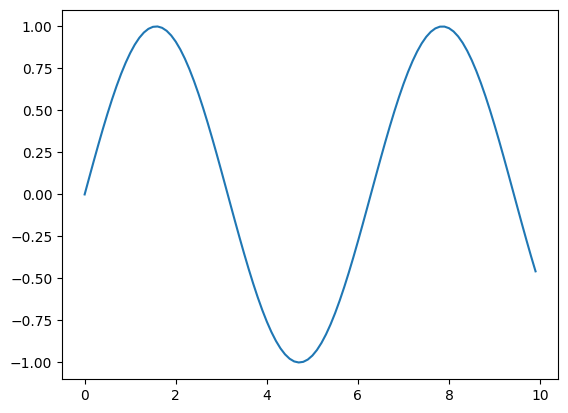

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.1)
y = np.sin(x)
plt.plot(x, y)

In [11]:
import gym
import d4rl # Import required to register environments

# Create the environment
env = gym.make('maze2d-umaze-v1')

# d4rl abides by the OpenAI gym interface
env.reset()
env.step(env.action_space.sample())

# Each task is associated with a dataset
# dataset contains observations, actions, rewards, terminals, and infos
dataset = env.get_dataset()
print(dataset['observations']) # An N x dim_observation Numpy array of observations

# Alternatively, use d4rl.qlearning_dataset which
# also adds next_observations.
dataset = d4rl.qlearning_dataset(env)

load datafile: 100%|██████████| 8/8 [00:00<00:00, 18.86it/s]


[[ 1.0856489   1.9745734   0.00981035  0.02174424]
 [ 1.0843927   1.97413    -0.12562364 -0.04433781]
 [ 1.0807577   1.9752754  -0.3634883   0.11453988]
 ...
 [ 1.1328583   2.8062387  -4.484303    0.09555068]
 [ 1.0883482   2.8068895  -4.4510083   0.06509537]
 [ 1.0463258   2.8074222  -4.202244    0.05324839]]


load datafile: 100%|██████████| 8/8 [00:00<00:00, 24.68it/s]


In [2]:
import gym
import d4rl # Import required to register environments, you may need to also import the submodule

# Create the environment
env = gym.make('maze2d-umaze-v1')

# d4rl abides by the OpenAI gym interface
env.reset()
env.step(env.action_space.sample())

# Each task is associated with a dataset
# dataset contains observations, actions, rewards, terminals, and infos
dataset = env.get_dataset()
print(dataset['observations']) # An N x dim_observation Numpy array of observations

load datafile: 100%|██████████| 8/8 [00:00<00:00, 35.51it/s]

[[ 1.0856489   1.9745734   0.00981035  0.02174424]
 [ 1.0843927   1.97413    -0.12562364 -0.04433781]
 [ 1.0807577   1.9752754  -0.3634883   0.11453988]
 ...
 [ 1.1328583   2.8062387  -4.484303    0.09555068]
 [ 1.0883482   2.8068895  -4.4510083   0.06509537]
 [ 1.0463258   2.8074222  -4.202244    0.05324839]]


In [3]:
print(dataset['observations'][1]) # An N x dim_observation Numpy array of observations

[ 1.0843927   1.97413    -0.12562364 -0.04433781]


In [4]:
dataset['observations'].shape # An N x dim_observation Numpy array of observations

(1000000, 4)

In [8]:
print(dataset['observations'][1])
print(dataset['actions'][1])
print(dataset['rewards'][1])
print(dataset['terminals'][1])
print(dataset['timeouts'][1])


[ 1.0843927   1.97413    -0.12562364 -0.04433781]
[-1.         0.6666507]
0.0
False
False


In [2]:
import gym
import d4rl # Import required to register environments

# Create the environment
env = gym.make('maze2d-umaze-v1')

# d4rl abides by the OpenAI gym interface
env.reset()
env.step(env.action_space.sample())

# Each task is associated with a dataset
# dataset contains observations, actions, rewards, terminals, and infos
dataset = env.get_dataset()
print(dataset['observations']) # An N x dim_observation Numpy array of observations

# Alternatively, use d4rl.qlearning_dataset which
# also adds next_observations.
dataset = d4rl.qlearning_dataset(env)

ModuleNotFoundError: No module named 'd4rl'

In [6]:
import gym
import d4rl

env = gym.make('halfcheetah-medium-v2')
dataset = env.get_dataset()
print(dataset['observations'].shape)

for i in range(1):
    pass

/usr/local/lib/python3.9/site-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


# gym 0.23.0 output video

In [2]:
import d4rl
import gym
import datetime

print(gym.__version__)
current_time = datetime.datetime.now()
env = gym.make('maze2d-umaze-v1')
# env = gym.make('Ant-v3')
env = gym.wrappers.RecordVideo(env, './videos/' + current_time.strftime("%Y-%m-%d %H:%M:%S"))
env.reset()
# observation, reward, done, info = env.step(env.action_space.sample())
# print(observation, reward, done ,info)
# while not done:
#     observation, reward, done, info = env.step(env.action_space.sample())
#     env.render()
# env.close()    
for i in range(1000000):
    _, reward, done, _ = env.step(env.action_space.sample())
    # env.render()
    if done:
        print(reward)
        break
env.close()

0.23.0
0.0


In [4]:
env.close()

In [2]:
import d4rl
import gym

print(gym.__version__)

env = gym.make('maze2d-umaze-v1')
env = gym.wrappers.RecordVideo(env, './videos')
env.reset()
observation, reward, done, info = env.step(env.action_space.sample())
print(observation, reward, done ,info)
env.render()
env.close()

Exception ignored in: <function VideoRecorder.__del__ at 0x7f373ab38670>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/gym/wrappers/monitoring/video_recorder.py", line 191, in __del__
    self.close()
  File "/usr/local/lib/python3.9/site-packages/gym/wrappers/monitoring/video_recorder.py", line 180, in close
    self.write_metadata()
  File "/usr/local/lib/python3.9/site-packages/gym/wrappers/monitoring/video_recorder.py", line 186, in write_metadata
    with open(self.metadata_path, "w") as f:
FileNotFoundError: [Errno 2] No such file or directory: '/root/volume/OfflineRL-Kit/videos/rl-video-episode-0.meta.json'


0.23.0
[ 2.98086842  2.00522791  0.10202309 -0.21972693] 0.0 False {}
Creating window glfw


In [8]:
import gymnasium as gym
from gymnasium.utils.save_video import save_video
env = gym.make("FrozenLake-v1", render_mode="rgb_array_list")
_ = env.reset()
step_starting_index = 0
episode_index = 0
for step_index in range(199): 
   action = env.action_space.sample()
   _, _, terminated, truncated, _ = env.step(action)

   if terminated or truncated:
      save_video(
         env.render(),
         "videos",
         fps=env.metadata["render_fps"],
         step_starting_index=step_starting_index,
         episode_index=episode_index
      )
      step_starting_index = step_index + 1
      episode_index += 1
      env.reset()
env.close()

print(gym.__version__)

Moviepy - Building video /root/volume/OfflineRL-Kit/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /root/volume/OfflineRL-Kit/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /root/volume/OfflineRL-Kit/videos/rl-video-episode-0.mp4
Moviepy - Building video /root/volume/OfflineRL-Kit/videos/rl-video-episode-1.mp4.
Moviepy - Writing video /root/volume/OfflineRL-Kit/videos/rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /root/volume/OfflineRL-Kit/videos/rl-video-episode-1.mp4
Moviepy - Building video /root/volume/OfflineRL-Kit/videos/rl-video-episode-8.mp4.
Moviepy - Writing video /root/volume/OfflineRL-Kit/videos/rl-video-episode-8.mp4



Moviepy - Done !
Moviepy - video ready /root/volume/OfflineRL-Kit/videos/rl-video-episode-8.mp4


0.27.0


In [2]:
import gym
print(gym.__version__)
from gym.utils.save_video import save_video
env = gym.make("FrozenLake-v1", render_mode="rgb_array_list")
env.reset()
step_starting_index = 0
episode_index = 0
for step_index in range(199):
   action = env.action_space.sample()
   _, _, done, _, _ = env.step(action)
   if done:
      save_video(
         env.render(),
         "videos",
         fps=env.metadata["render_fps"],
         step_starting_index=step_starting_index,
         episode_index=episode_index
      )
      step_starting_index = step_index + 1
      episode_index += 1
      env.reset()
env.close()

0.26.2
Moviepy - Building video /root/volume/OfflineRL-Kit/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /root/volume/OfflineRL-Kit/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /root/volume/OfflineRL-Kit/videos/rl-video-episode-0.mp4
Moviepy - Building video /root/volume/OfflineRL-Kit/videos/rl-video-episode-1.mp4.
Moviepy - Writing video /root/volume/OfflineRL-Kit/videos/rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /root/volume/OfflineRL-Kit/videos/rl-video-episode-1.mp4
Moviepy - Building video /root/volume/OfflineRL-Kit/videos/rl-video-episode-8.mp4.
Moviepy - Writing video /root/volume/OfflineRL-Kit/videos/rl-video-episode-8.mp4



Moviepy - Done !
Moviepy - video ready /root/volume/OfflineRL-Kit/videos/rl-video-episode-8.mp4


In [2]:
import gym
print(gym.__version__)

printI

0.23.0


In [1]:
import argparse


def get_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--env', type=str, default='maze2d-umaze-v1')
    
if __name__ == '__main__':   
    get_args()

In [15]:
!python test.ipynb --env maze2d-umaze-v1

Traceback (most recent call last):
  File "/root/volume/OfflineRL-Kit/test.ipynb", line 5, in <module>
    "execution_count": null,
NameError: name 'null' is not defined


In [ ]:
import argparse


def get_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--env', type=str, default='maze2d-umaze-v1')

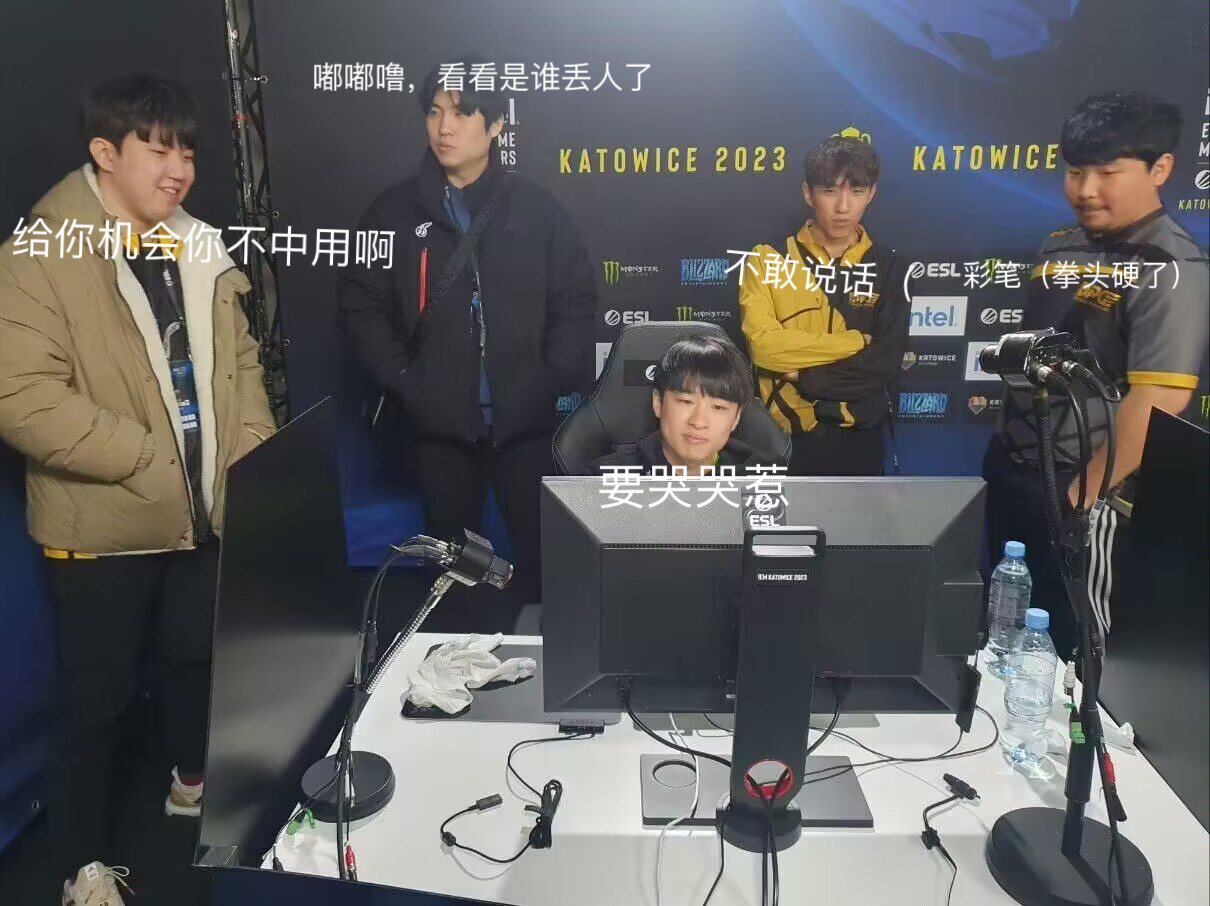

In [4]:
!python run_example/run_mopo.py --task maze2d-umaze-dense-v1

No module named 'flow'
No module named 'carla'
pybullet build time: May 20 2022 19:45:31
load datafile: 100%|██████████████████████████████| 8/8 [00:00<00:00, 31.68it/s]
Traceback (most recent call last):
  File "/root/volume/OfflineRL-Kit/run_example/run_mopo.py", line 221, in <module>
    train()
  File "/root/volume/OfflineRL-Kit/run_example/run_mopo.py", line 140, in train
    termination_fn = get_termination_fn(task=args.task)
  File "/usr/local/lib/python3.9/site-packages/offlinerlkit-0.0.1-py3.9.egg/offlinerlkit/utils/termination_fns.py", line 149, in get_termination_fn
TypeError: exceptions must derive from BaseException


root@50ac9c6e2c31:/volume#